# Exploratory Data Analysis (EDA)

This notebook provides a step-by-step exploratory data analysis workflow for crop and irrigation datasets.

## Table of Contents
1. Import Required Libraries
2. Load Datasets
3. Dataset Overview
4. Statistical Summary
5. Missing Values Analysis
6. Data Distribution Visualization
7. Correlation Analysis
8. Outlier Detection
9. Categorical Variables Analysis
---

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 2. Load Datasets

In [2]:
# Load crop and irrigation datasets
crop_data = pd.read_csv('../data/crop_data.csv')
irrigation_data = pd.read_csv('../data/Final_irregation_optimization_data.csv')

print('Crop Data Shape:', crop_data.shape)
print('Irrigation Data Shape:', irrigation_data.shape)

Crop Data Shape: (2200, 8)
Irrigation Data Shape: (100000, 35)


## 3. Dataset Overview

In [3]:
# Show columns and sample rows
print('Crop Data Columns:', crop_data.columns)
print('Irrigation Data Columns:', irrigation_data.columns)

print('Crop Data Sample:')
display(crop_data.head())
print('Irrigation Data Sample:')
display(irrigation_data.head())

Crop Data Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Irrigation Data Columns: Index(['soil_moisture', 'temperature', 'soil_humidity', 'time',
       'air_temperature_(c)', 'wind_speed_(km/h)', 'humidity',
       'wind_gust_(km/h)', 'pressure_(kpa)', 'ph', 'rainfall', 'n', 'p', 'k',
       'status', 'crop', 'soil_moisture_diff', 'Relative_Soil_Saturation',
       'temp_diff', 'wind_effect', 'Evapotranspiration', 'rain_3days',
       'rain_vs_soil', 'np_ratio', 'nk_ratio', 'ph_category', 'ph_encoded',
       'crop_encoded', 'moisture_temp_ratio', 'evapo_ratio', 'rain_effect',
       'moisture_change_rate', 'temp_scaled', 'npk_balance', 'wind_ratio'],
      dtype='object')
Crop Data Sample:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Irrigation Data Sample:


,soil_moisture,temperature,soil_humidity,time,air_temperature_(c),wind_speed_(km/h),humidity,wind_gust_(km/h),pressure_(kpa),ph,...,ph_category,ph_encoded,crop_encoded,moisture_temp_ratio,evapo_ratio,rain_effect,moisture_change_rate,temp_scaled,npk_balance,wind_ratio
0,54.0,22.0,70.0,21.0,19.52,2.13,55.04,6.30,101.50,6.502985,...,2,1,0.569876,2.347826,683.561290,30224.312898,0.000000,-0.107826,58.333333,0.291781
1,12.0,20.0,40.0,104.0,19.49,2.01,55.17,10.46,101.50,7.038096,...,2,1,0.472449,0.571429,848.769231,48652.866185,0.000000,-0.024286,61.333333,0.175393
2,34.0,26.0,35.0,62.0,19.47,1.90,55.30,14.63,101.51,7.840207,...,1,2,0.472449,1.259259,729.318841,60702.339593,0.628571,-0.241852,53.000000,0.121561
3,7.0,44.0,44.0,93.0,19.54,2.28,54.20,16.08,101.51,6.980401,...,2,1,0.472449,0.155556,2057.474510,57282.890868,-3.375000,-0.543556,49.666667,0.133489
4,50.0,38.0,23.0,92.0,19.61,2.66,53.09,17.52,101.51,7.628473,...,1,2,0.472449,1.282051,635.625479,55884.533974,0.843137,-0.471538,54.000000,0.143629


## 4. Statistical Summary

In [4]:
# Statistical summary for crop and irrigation data
print('Crop Data Statistical Summary:')
display(crop_data.describe(include='all'))
print('Irrigation Data Statistical Summary:')
display(irrigation_data.describe(include='all'))

Crop Data Statistical Summary:


,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


Irrigation Data Statistical Summary:


,soil_moisture,temperature,soil_humidity,time,air_temperature_(c),wind_speed_(km/h),humidity,wind_gust_(km/h),pressure_(kpa),ph,...,ph_category,ph_encoded,crop_encoded,moisture_temp_ratio,evapo_ratio,rain_effect,moisture_change_rate,temp_scaled,npk_balance,wind_ratio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,45.484070,22.536100,45.016790,55.253650,24.240188,9.886338,58.640681,41.678999,101.131310,6.496485,...,0.966910,0.48929,0.536500,4.321199,702.499905,8079.660946,-1.093341,1.396450,50.319729,0.243587
std,25.993998,13.251352,14.726676,32.093033,4.225627,2.712243,18.784521,15.107778,0.136599,0.364238,...,0.997509,0.50761,0.087820,8.693697,575.859261,8493.856953,3.898629,4.099008,12.229497,0.058023
min,1.000000,0.000000,20.000000,0.000000,11.220000,0.000000,0.590000,0.000000,100.500000,3.504752,...,0.000000,0.00000,0.363167,0.021739,0.000000,-2024.817146,-44.500000,-0.711087,5.666667,0.000000
25%,23.000000,11.000000,32.000000,28.000000,21.404000,8.288000,47.904000,32.041500,101.054000,6.253733,...,0.000000,0.00000,0.423383,0.977778,259.440737,2692.619983,-0.904762,-0.283823,41.333333,0.209169
50%,45.000000,23.000000,45.000000,55.000000,23.930000,9.770000,59.282000,40.800000,101.128000,6.488283,...,0.000000,0.00000,0.573977,1.933333,575.115117,6055.267593,0.000000,0.074618,48.933333,0.230948
75%,68.000000,34.000000,58.000000,83.000000,26.586000,11.330000,70.540000,49.956500,101.206000,6.733716,...,2.000000,1.00000,0.573977,3.750000,998.164241,10793.289919,0.473684,1.099534,57.933333,0.260373
max,90.000000,45.000000,70.000000,110.000000,45.560000,31.360000,96.000000,133.330000,101.860000,8.985348,...,2.000000,2.00000,0.699634,90.000000,4155.870968,87850.054964,0.978022,41.400000,126.666667,0.614812


## 5. Missing Values Analysis

In [5]:
# Function to show missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,0] > 0]

print('Crop Data Missing Values:')
display(missing_values_table(crop_data))
print('Irrigation Data Missing Values:')
display(missing_values_table(irrigation_data))

Crop Data Missing Values:


,Missing Values,% of Total Values


Irrigation Data Missing Values:


,Missing Values,% of Total Values


## 6. Data Distribution Visualization

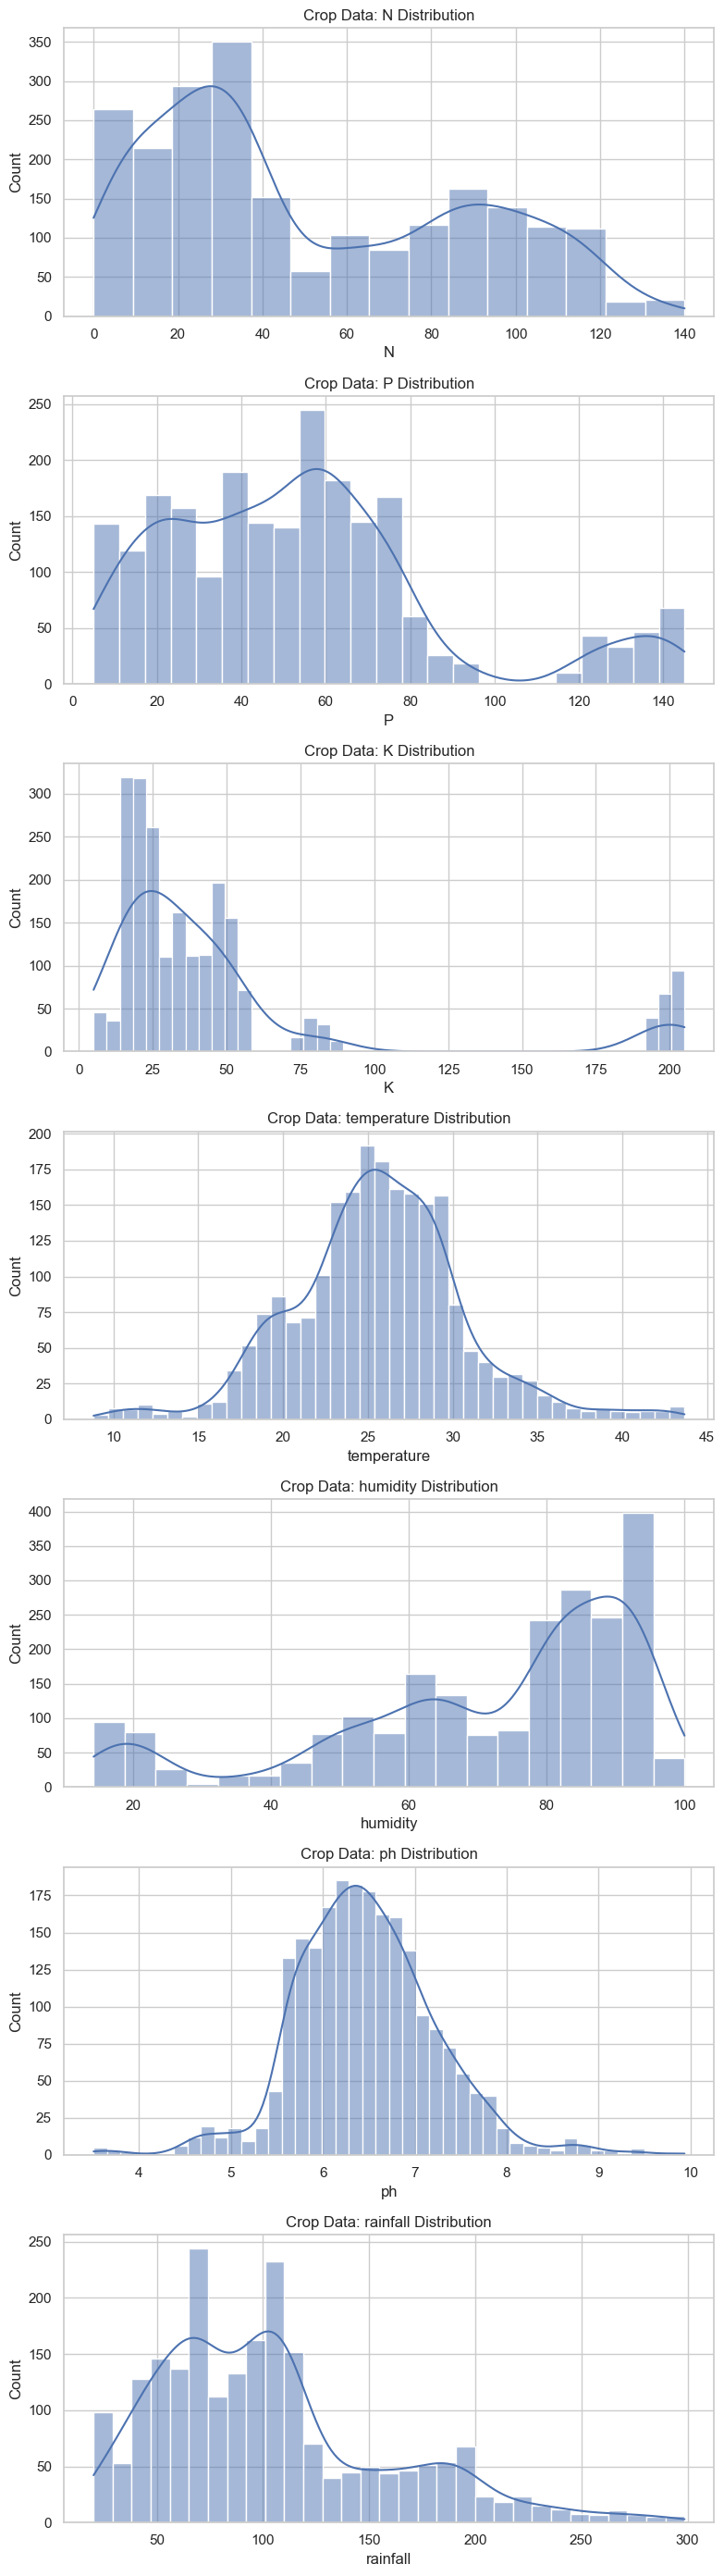

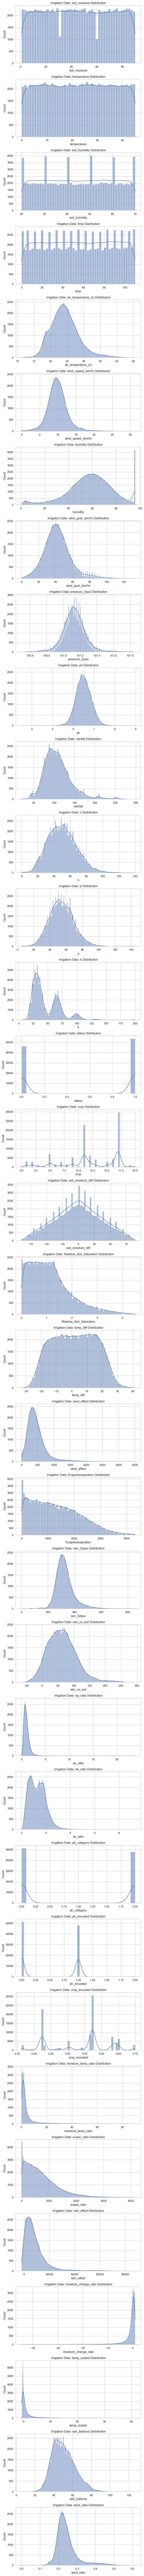

In [6]:
# Visualize numeric feature distributions
num_cols_crop = crop_data.select_dtypes(include=np.number).columns
num_cols_irrigation = irrigation_data.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(len(num_cols_crop), 1, figsize=(8, 4*len(num_cols_crop)))
for i, col in enumerate(num_cols_crop):
    sns.histplot(crop_data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Crop Data: {col} Distribution')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(num_cols_irrigation), 1, figsize=(8, 4*len(num_cols_irrigation)))
for i, col in enumerate(num_cols_irrigation):
    sns.histplot(irrigation_data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Irrigation Data: {col} Distribution')
plt.tight_layout()
plt.show()

## 7. Correlation Analysis

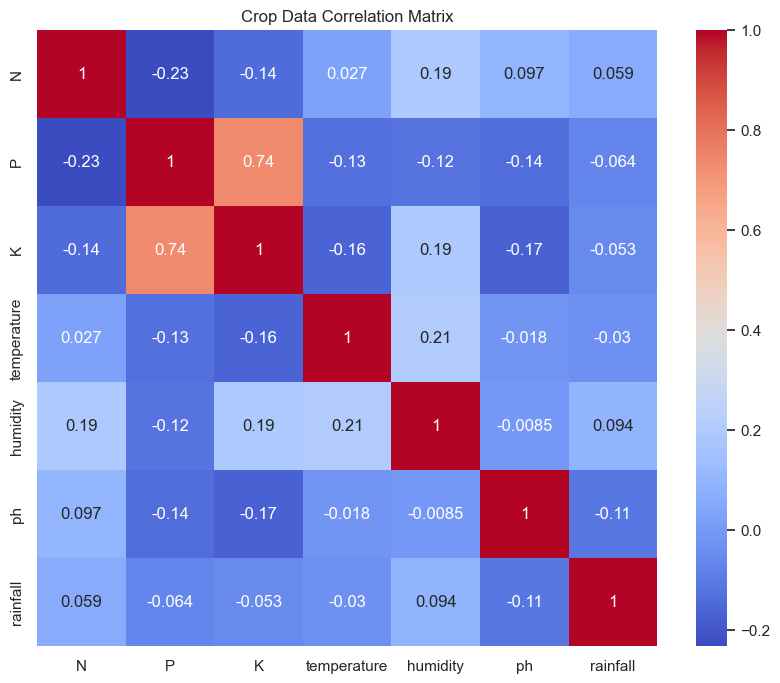

In [12]:
# Correlation heatmaps for numeric features
numeric_crop = crop_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_crop.corr(), annot=True, cmap='coolwarm')
plt.title('Crop Data Correlation Matrix')
plt.show()

## 8. Outlier Detection

In [13]:
# Outlier detection using IQR method
for col in num_cols_crop:
    Q1 = crop_data[col].quantile(0.25)
    Q3 = crop_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = crop_data[(crop_data[col] < Q1 - 1.5 * IQR) | (crop_data[col] > Q3 + 1.5 * IQR)]
    print(f'Crop Data Outliers in {col}:', outliers.shape[0])

for col in num_cols_irrigation:
    Q1 = irrigation_data[col].quantile(0.25)
    Q3 = irrigation_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = irrigation_data[(irrigation_data[col] < Q1 - 1.5 * IQR) | (irrigation_data[col] > Q3 + 1.5 * IQR)]
    print(f'Irrigation Data Outliers in {col}:', outliers.shape[0])

Crop Data Outliers in N: 0
Crop Data Outliers in P: 138
Crop Data Outliers in K: 200
Crop Data Outliers in temperature: 86
Crop Data Outliers in humidity: 30
Crop Data Outliers in ph: 57
Crop Data Outliers in rainfall: 100
Irrigation Data Outliers in soil_moisture: 0
Irrigation Data Outliers in temperature: 0
Irrigation Data Outliers in soil_humidity: 0
Irrigation Data Outliers in time: 0
Irrigation Data Outliers in air_temperature_(c): 2638
Irrigation Data Outliers in wind_speed_(km/h): 4015
Irrigation Data Outliers in humidity: 2660
Irrigation Data Outliers in wind_gust_(km/h): 2999
Irrigation Data Outliers in pressure_(kpa): 3773
Irrigation Data Outliers in ph: 1079
Irrigation Data Outliers in rainfall: 3142
Irrigation Data Outliers in n: 792
Irrigation Data Outliers in p: 1116
Irrigation Data Outliers in k: 737
Irrigation Data Outliers in status: 0
Irrigation Data Outliers in crop: 0
Irrigation Data Outliers in soil_moisture_diff: 0
Irrigation Data Outliers in Relative_Soil_Saturat

## 9. Categorical Variables Analysis

In [9]:
# Analyze categorical variables
cat_cols_crop = crop_data.select_dtypes(include='object').columns
cat_cols_irrigation = irrigation_data.select_dtypes(include='object').columns

for col in cat_cols_crop:
    print(f'Crop Data: {col} Value Counts')
    print(crop_data[col].value_counts())
    print('\n')

for col in cat_cols_irrigation:
    print(f'Irrigation Data: {col} Value Counts')
    print(irrigation_data[col].value_counts())
    print('\n')

Crop Data: label Value Counts
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


